# Car Price

## 1. Data Cleaning
- **make**: make of a car (BMW, Toyota, and so on)
- **model**: model of a car
- **year**: year when the car was manufactured
- **engine_fuel_type**: type of fuel the engine needs (diesel, electric, and so on)
- **engine_hp**: horsepower of the engine
- **engine_cylinders**: number of cylinders in the engine
- **transmission_type**: type of transmission (automatic or manual)
- **driven_wheels**: front, rear, all
- **number_of_doors**: number of doors a car has
- **market_category**: luxury, crossover, and so on
- **vehicle_size**: compact, midsize, or large
- **vehicle_style**: sedan or convertible
- **highway_mpg**: miles per gallon (mpg) on the highway
- **city_mpg**: miles per gallon in the city
- **popularity**: number of times the car was mentioned in a Twitter stream
- **msrp** (price): manufacturer’s suggested retail price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import norm


In [2]:
df = pd.read_csv('../../input/dataset/car_price.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 1.1. Uniform Column Name & String Column

In [4]:
#Uniform format -> easy to call df.col_name
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df = df.rename(columns={'msrp': 'price'})

### 1.2. Dropping the missing/null values and duplicates

#### 1.2.1 Missing/null values

In [5]:
df[~df.engine_hp.isnull()].head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
df.shape

(11914, 16)

In [7]:
df.isna().sum()*100 / df.shape[0]

make                  0.000000
model                 0.000000
year                  0.000000
engine_fuel_type      0.025180
engine_hp             0.579151
engine_cylinders      0.251805
transmission_type     0.000000
driven_wheels         0.000000
number_of_doors       0.050361
market_category      31.408427
vehicle_size          0.000000
vehicle_style         0.000000
highway_mpg           0.000000
city_mpg              0.000000
popularity            0.000000
price                 0.000000
dtype: float64

In [8]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
dtype: int64

In [9]:
df['market_category'].value_counts().head()

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

#### 1.2.2. Duplicates

In [10]:
df.duplicated().sum()

715

In [11]:
df.loc[df.duplicated()].head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
24,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
25,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000


In [12]:
df.query("make == 'bmw' and model == '1_series' and year == 2013 and price == 31500")

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500


- As you can see, the .duplicated() will return the index of the second occurence of the duplicated row

In [13]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [14]:
df.shape

(11199, 16)

## 2. EDA

### 2.1. Univariate Analysis
- Plotting Feature Distributions
    - Continuous variable
        - Histogram
        - KDE
        - Boxplot 
    - Discrete variable
        - Count plot

#### 2.1.1. Target Variable

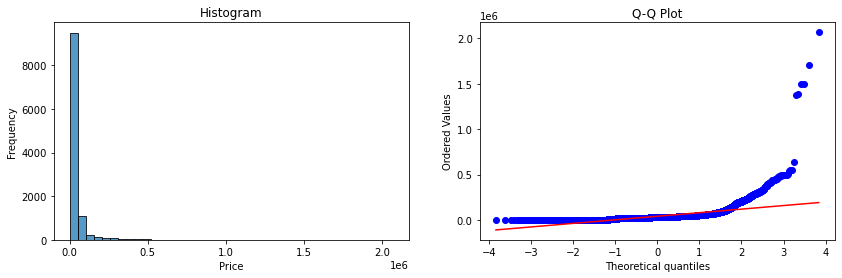

In [15]:
def plot_dist(df, xlabel='Price' ):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(df, bins=40, ax=ax1)
    ax1.set(title='Histogram', ylabel='Frequency', xlabel=xlabel)
    
    #Get also the QQ-plot
    stats.probplot(df, plot=ax2)
    ax2.set_title('Q-Q Plot')
    plt.show()

plot_dist(df['price'])

In [16]:
print(f"Skewness: {df['price'].skew()}")
print(f"Kurtosis: {df['price'].kurt()}")

Skewness: 11.609709303878942
Kurtosis: 259.3760319803945


- **Long tail distribution** (many cars with low prices on the left side, but the number quickly drops, and there’s a long tail of very few cars with high prices)
    - The model, so it won’t learn well enough with this kind of distribution
    - Log transformation: `y_new = log(y+1)` (+1 as log 0 ~ infinite)


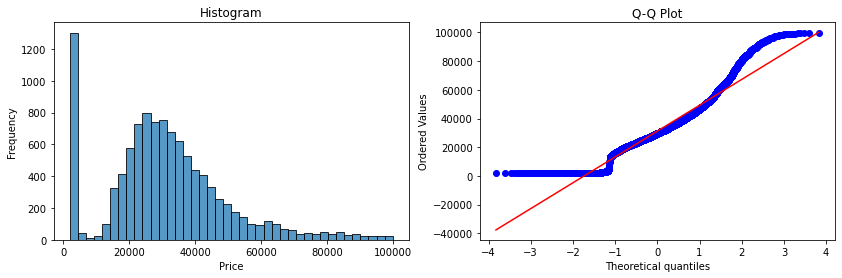

In [17]:
# zoom in by looking at values below $100,000
plot_dist(df['price'][df.price < 100000])

- From above pic, a lot of cars that cost $1,000

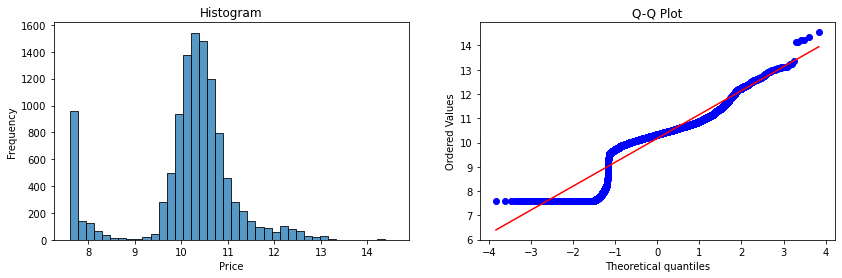

In [18]:
# Taking log(y+1)
plot_dist(np.log1p(df['price']))

- This log transformation removes the long tail, and now the distribution resembles a bell-shaped curve. This distribution is not normal, of course, because of the large peak in lower prices, but the model can deal with it more easily.

#### 2.2. Feature Cols

##### 2.2.1. Catergorical or Numerical (Discrete) Features

In [19]:
def plot_count(df, col_name, sort=False, rotation=0):
    _, ax = plt.subplots(figsize=(12,4))
    order = df[col_name].value_counts().index if sort else None
    sns.countplot(data=df, x=col_name, ax=ax, order = order)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=rotation, ha='right')
    plt.show()
    

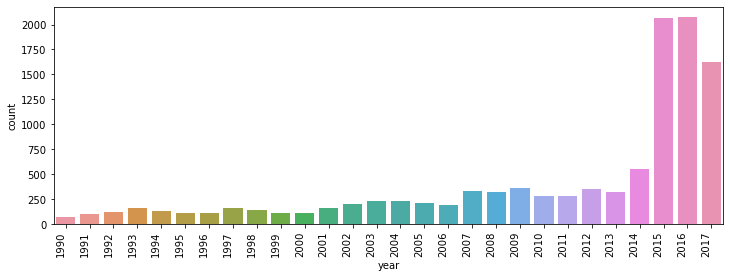

In [20]:
# year
plot_count(df, 'year', rotation=90)

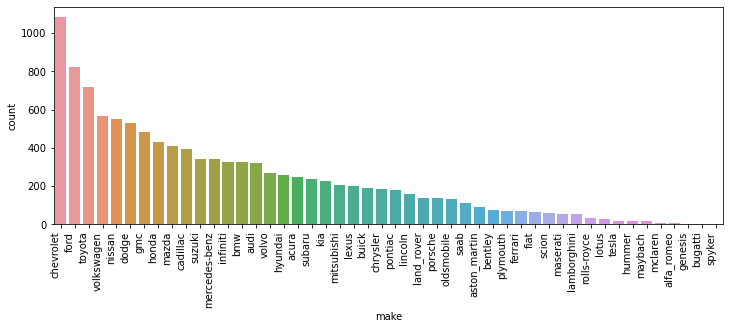

In [21]:
plot_count(df, 'make', sort=True, rotation=90)

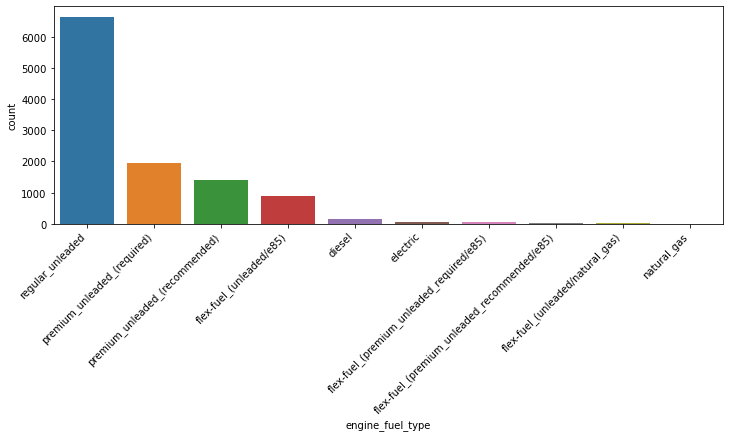

In [22]:
plot_count(df, 'engine_fuel_type', sort=True, rotation=45)

### 1.4. Numerical features
- Feature against target: scatter plot 
- Features against one another (scatter): pair (scatter) plot


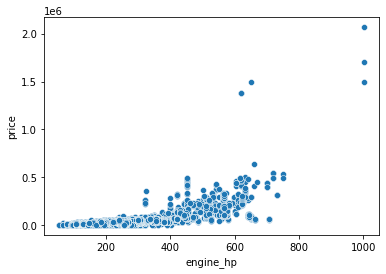

In [23]:
sns.scatterplot(data=df, x='engine_hp', y='price');

- There is a linear relationship between `engine_hp` and `price`
- There are couple of outliers where the `engine_hp` around 700 but then `price` is significantly high

In [24]:
df.query('engine_hp > 600 and price > 1000000').head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
6000,maybach,landaulet,2011,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",large,convertible,16,10,67,1380000
6001,maybach,landaulet,2012,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,convertible,16,10,67,1382750
7973,lamborghini,reventon,2008,premium_unleaded_(required),650.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,9,1158,1500000
10661,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,2065902
10662,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1500000


In [25]:
df.query('engine_hp > 1000').head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
10661,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,2065902
10662,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1500000
10663,bugatti,veyron_16.4,2009,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1705769


The decision to consider a numerical column as categorical based on the number of discrete values is not a strict rule, and the threshold can vary depending on the context of your data and your specific analysis goals. 
- Categorical Features (numerical): `['year', 'engine_cylinders', 'number_of_doors']`

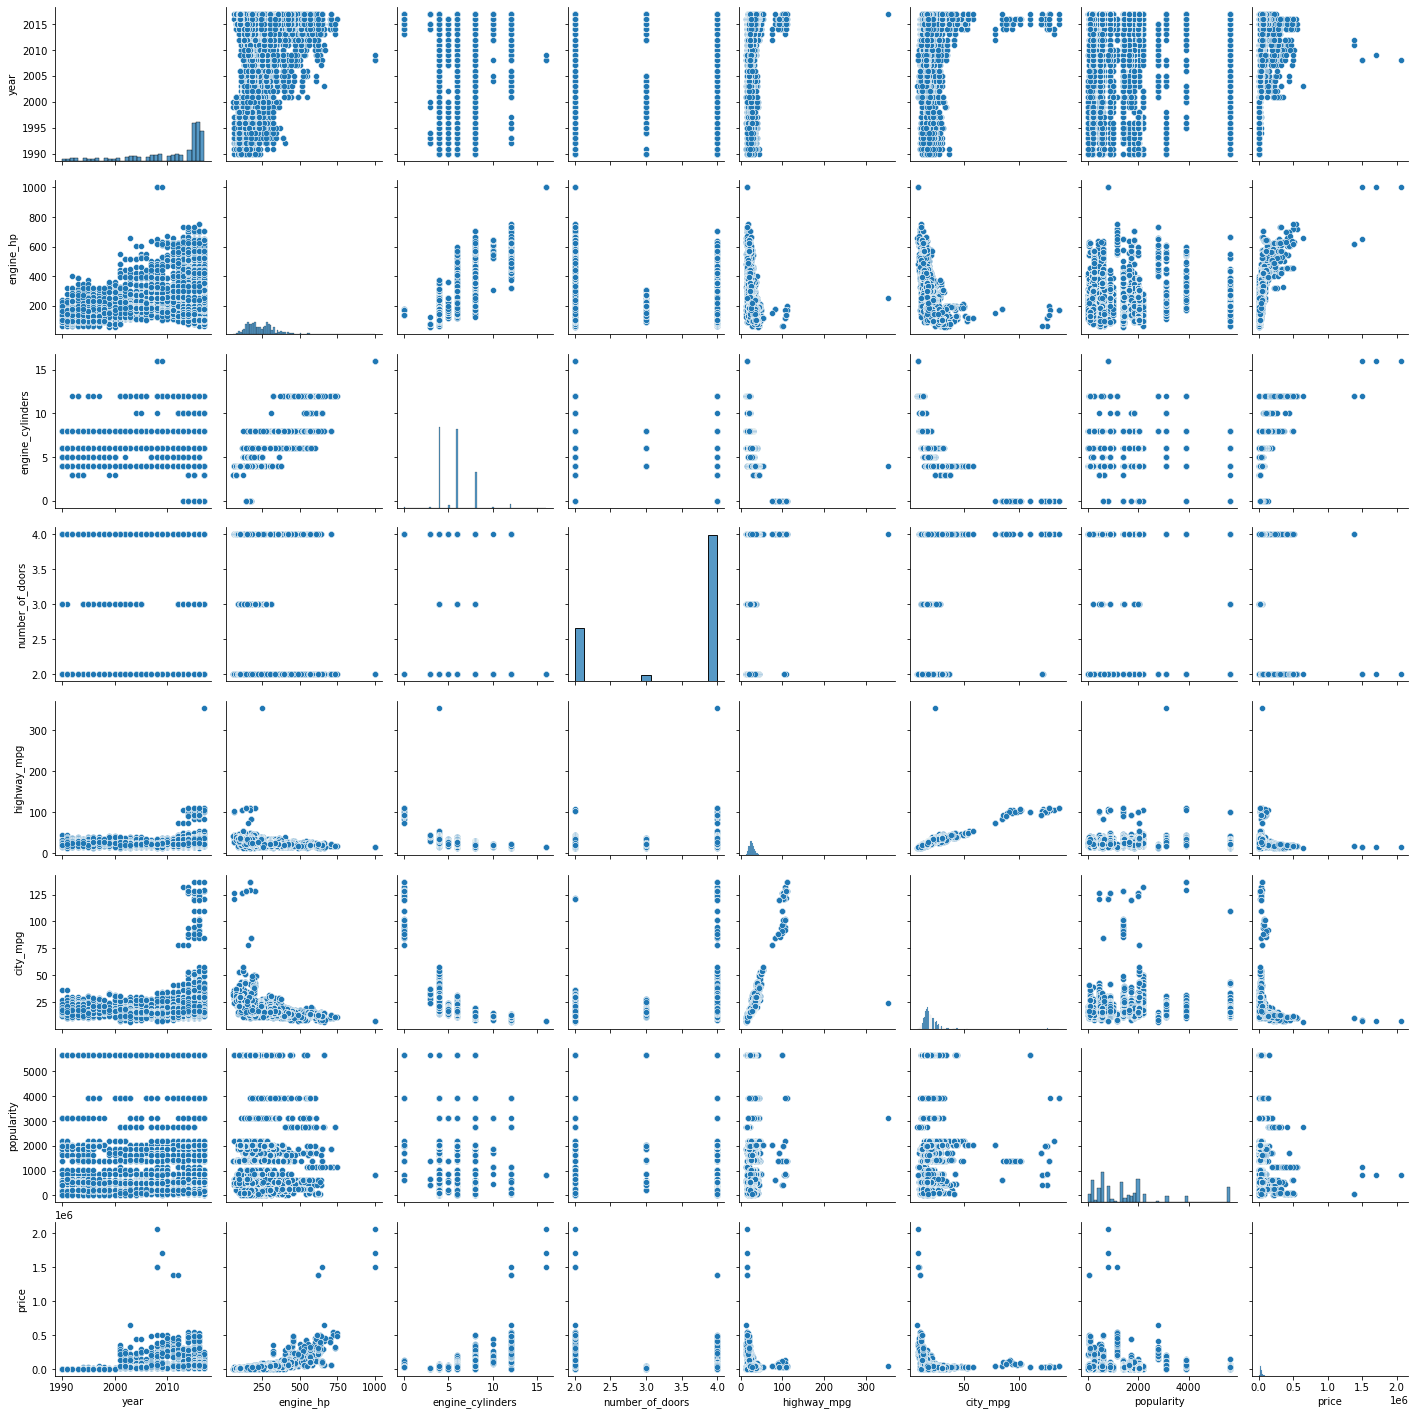

In [26]:
sns.pairplot(data=df);

### 1.5. Categorical Feature

#### Histogram
Histogram refers to the frequency of occurrence of variables in an interval.

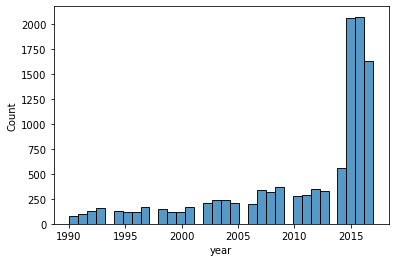

In [79]:
sns.histplot(df['year']);

## 2 Linear Regression
- Model Input: **feature matrix** `X`
- Model Output: $y_{pred}$ **vector of predictions** is obtained, trying to be as close as possible to the **actual** `y` values.
- Linear regression formula:
    - $f(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.
    - $f(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

- If we generalise the above equation for entire $x$ in the dataset
    - $f(X) = w_0 + X \cdot w$
- The formula of linear regression can be synthesized with the dot product between features matrix $X$ and weights $w$. The feature vector includes the *bias* term with an *x* value of one, such as $w_{0}^{x_{i0}},\ where\ x_{i0} = 1\ for\ w_0$.
    - $f(X) = X \cdot w$

In [31]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

X = np.vstack((x1,x2,x3))

In [35]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

- Goal: To obtain the vector of weights or coefficients $w$, we use the target variable $y$ to find $w$ such that $w$ combines with features matrix $X$ will result in the minimum error between $y_{pred}$
    - $X \cdot w \approx y$ (Note: $\approx$ as we won't be able to find the "best" $w$ to obtain the $=$)
    - $X^{-1} \cdot X \cdot w = X^{-1} \cdot y$ 
    - $I \cdot w = X^{-1} \cdot y$  
    - $w = X^{-1} \cdot y$ 
- However, $X^{-1}$ might not exists as $X$ usually has the rectangle form, so we can solve the equation  $X \cdot w=y$  by using **GRAM Matrix** $X^{T} \cdot X$ as this Matrix will result in square matrix of $(n+1) * (n+1)$
    - $X \cdot w=y$ 
    - $X^{T} \cdot X \cdot w = X^{T} \cdot y$ 
    - $(X^{T} \cdot X)^{-1} \cdot( X^{T} \cdot X) \cdot w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y$ 
    - $w = (X^{T} \cdot X)^{-1} \cdot X^{T}  \cdot y$ 
- Hence, this $w = (X^{T} \cdot X)^{-1} \cdot X^{T}  \cdot y$  is called as **Normal Equation**


In [43]:
n = len(df)                                              
test_size = 0.2
n_val = int(test_size * n)                                     
n_test = int(test_size * n)                                    
n_train = n - (n_val + n_test)                           
 
np.random.seed(2023)                                       
idx = np.arange(n)                                     
np.random.shuffle(idx)                                  
 
df_shuffled = df.iloc[idx]                              
 
df_train = df_shuffled.iloc[:n_train].copy()             
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  
df_test = df_shuffled.iloc[n_train+n_val:].copy()  

In [85]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
        'popularity']
X_train_num = df_train[base]
X_train_num = X_train_num.fillna(0) # simplest possible approach is to fill the missing values with zeros

y_train = np.log1p(df_train.price.values)
y_val   = np.log1p(df_val.price.values)
y_test  = np.log1p(df_test.price.values)

In [102]:
class LinearRegression:
    def __init__(self):
        self.w0 = None
        self.w = None
    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
        
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w0, self.w = w[0], w[1:]

    def predict(self, X):
        if not self.w0:
            raise ValueError(f"w0={self.w0} or w={self.w}.\nPlease .fit() the training data first")
        return self.w0 + X.dot(self.w)
    
        

In [103]:
model = LinearRegression()
model.fit(X_train_num, y_train)

### Root Mean Squared Error (RMSE)
* Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure then can be used to compare the models, enabling us to choose the one that gives the best predictions.

$$RMSE = \sqrt{ \frac{1}{m} \sum {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual
- $m$ is the number of observations in the dataset (i.e. cars)

In [116]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
            'city_mpg','popularity']
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [117]:
from sklearn.metrics import mean_squared_error
def calculate_metrics(model, X, y_true):
    y_pred = model.predict(X)
    #  on average, the model’s predictions are off by 0.74. 
    print(f"RMSE on Val set: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [118]:
X_val = prepare_X(df_val)
calculate_metrics(model, X_val, y_val)

RMSE on Val set: 0.7419


RMSE on Val set: 0.7419
